In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.draw import line_aa
from skimage.draw import line_aa
import seaborn as sns

from model import Izhikevich
from network import Connectivity
from simulation import Simulation
from measure import Measure

C:\Users\User\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
filters = [[[1,1],[0,0]],
           [[0,1],[1,0]], 
           [[1,0],[1,0]], 
           [[1,0],[0,1]]]

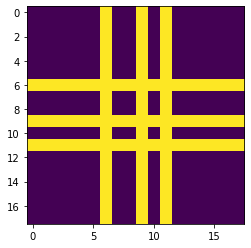

In [3]:
#image generation
inp_strength = 1
height, width = 18, 18
img = np.zeros(shape=(height,width))

rr, cc, _ = line_aa(0, int(width*3/8), height-1, int(width*3/8))  
img[rr, cc] = inp_strength

rr, cc, _ = line_aa(0, int(width/2), height-1, int(width/2))  
img[rr, cc] = inp_strength

rr, cc, _ = line_aa(0, int(width*5/8), height-1, int(width*5/8))  
img[rr, cc] = inp_strength

rr, cc, _ = line_aa(int(height*3/8), 0, int(height*3/8), width-1)  
img[rr, cc] = inp_strength

rr, cc, _ = line_aa(int(height/2), 0, int(height/2), width-1)  
img[rr, cc] = inp_strength

rr, cc, _ = line_aa(int(height*5/8), 0, int(height*5/8), width-1)  
img[rr, cc] = inp_strength

plt.imshow(img)
plt.show()

In [4]:
sim = Simulation(img, filters)

In [5]:
voltage, recovery, firings = sim.run(1000)

Simulated 100 ms of braintime in 0.3208675000000003 s of computer time.
Simulated 200 ms of braintime in 0.35600589999999954 s of computer time.
Simulated 300 ms of braintime in 0.42952670000000026 s of computer time.
Simulated 400 ms of braintime in 0.4723012999999998 s of computer time.
Simulated 500 ms of braintime in 0.5156276000000002 s of computer time.
Simulated 600 ms of braintime in 0.6162410999999999 s of computer time.
Simulated 700 ms of braintime in 0.6539523999999997 s of computer time.
Simulated 800 ms of braintime in 0.7179228999999996 s of computer time.
Simulated 900 ms of braintime in 0.7671352999999996 s of computer time.
Simulation took 0.8198951999999995 s


In [6]:
voltage_out = voltage.copy()
voltage_out[voltage_out >= 30] = 30

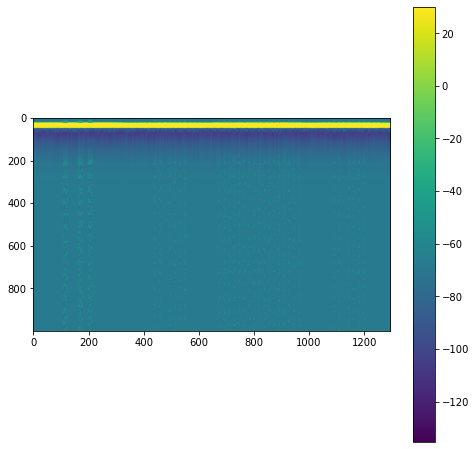

In [7]:
h, w = voltage_out.shape

fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(voltage_out.T) 
plt.colorbar()

ax.set_aspect(w/h)
plt.show()

In [8]:
def firing_stats(firings):
    if not isinstance(firings, np.ndarray):
        firings = np.array(firings)
    if len(firings.shape) == 1:
        firings_count = firings.sum()
        return firings.sum()
        
    firings_count = firings.sum(1)
    return {'max': np.max(firings_count), 'min': np.min(firings_count), 'mean': np.mean(firings_count), 'median': np.median(firings_count)}

In [21]:
populations = sim.angle_populations()

firing_stats(firings[populations[0]])

{'max': 50.0, 'min': 37.0, 'mean': 39.78431372549019, 'median': 39.0}

In [22]:
for i, pop in enumerate(populations):
    if len(pop) > 0:
        firings_selected = firings[pop,:]
        print(i, firing_stats(firings_selected))
        
        measure = Measure(firings_selected, 'victor_purpura')
        r = measure.dissimilarity()
        print(i, r, '\n')

0 {'max': 50.0, 'min': 37.0, 'mean': 39.78431372549019, 'median': 39.0}
51 spike trains to compare
0 {'median': 2.1699999999999964, 'mean': 3.071747450980394, 'max': 13.172000000000002, 'min': 0.053999999999999826} 

1 {'max': 49.0, 'min': 36.0, 'mean': 40.388888888888886, 'median': 39.0}
18 spike trains to compare
1 {'median': 3.2960000000000047, 'mean': 4.675640522875819, 'max': 13.112999999999996, 'min': 0.1110000000000011} 

2 {'max': 51.0, 'min': 36.0, 'mean': 41.372549019607845, 'median': 40.0}
51 spike trains to compare
2 {'median': 4.126999999999999, 'mean': 4.680610980392158, 'max': 15.135, 'min': 0.07800000000000096} 

3 {'max': 46.0, 'min': 37.0, 'mean': 40.666666666666664, 'median': 40.0}
18 spike trains to compare
3 {'median': 3.190000000000003, 'mean': 3.385830065359479, 'max': 9.156999999999996, 'min': 0.10800000000000187} 



In [32]:
active_ids = np.concatenate(populations)
rand = np.random.choice(active_ids, size=18, replace=False)

In [33]:
measure_rand = Measure(firings[rand,:])
r_rand = measure_rand.dissimilarity()
print(r_rand)

18 spike trains to compare
{'median': 2.6106605702215337, 'mean': 3.296228909880391, 'max': 10.218301340265675, 'min': 0.5096463953655704}
